### Data exploitation for Capstone project

In [53]:
import random
import pandas as pd
AAPLData = pd.read_csv("AAPL.csv")

In [54]:
AAPLData.head(10)
# This is the data for a given stock indicator 'AAPL'

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-02,154.259995,154.449997,152.720001,153.809998,153.809998,18698800
1,2017-10-03,154.009995,155.089996,153.910004,154.479996,154.479996,16230300
2,2017-10-04,153.630005,153.860001,152.460007,153.479996,153.479996,20163800
3,2017-10-05,154.179993,155.440002,154.050003,155.389999,155.389999,21283800
4,2017-10-06,154.970001,155.490005,154.559998,155.300003,155.300003,17407600
5,2017-10-09,155.809998,156.729996,155.490005,155.839996,155.839996,16262900
6,2017-10-10,156.059998,158.000000,155.100006,155.899994,155.899994,15617000
7,2017-10-11,155.970001,156.979996,155.750000,156.550003,156.550003,16905600
8,2017-10-12,156.350006,157.369995,155.729996,156.000000,156.000000,16125100
9,2017-10-13,156.729996,157.279999,156.410004,156.990005,156.990005,16394200


In [55]:
import matplotlib.pyplot as plt

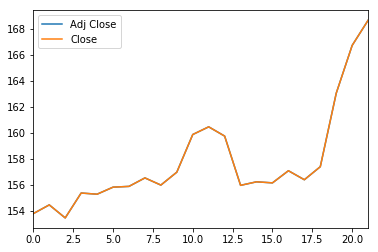

In [27]:
# plot the closing price over time
cloPri=AAPLData[['Adj Close','Close']]
cloPri.plot()
plt.show()

In [67]:

##join multiple stock data:
dates=pd.date_range('2010-10-31','2017-10-31')

#Read Stock data 
def readStocks(symbols):
    #create empty dataframe:
    df1=pd.DataFrame(index=dates)
    for symbol in symbols:
        dfStock=pd.read_csv("{}.csv".format(symbol),index_col='Date',parse_dates=True, usecols=['Date','Adj Close'],na_values=['nan'])
        dfStock=dfStock.rename(columns={'Adj Close':symbol})
        #join dataset together:
        df1=df1.join(dfStock,how='inner')
    return df1

In [80]:
dfStocks=readStocks(['SPY','AMZN','DPZ'])

#### Plot the stocks on the same graph

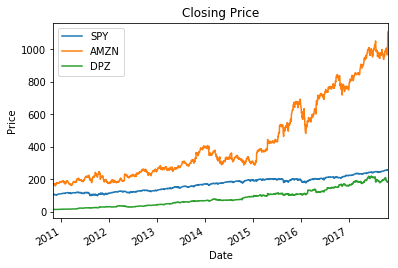

In [81]:
#plot these stock data together:
def plotStocks(df,title):
    ax=df.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

plotStocks(dfStocks,'Closing Price')

In [112]:
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    dfTemp=df.loc[start_index:end_index,columns]
    #normalize data
    dfTemp=dfTemp/dfTemp.iloc[0,:]
    ax=dfTemp.plot(title='Selected Data')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()


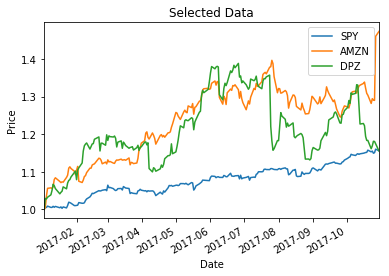

SPY     239.256219
AMZN    931.061435
DPZ     190.172724
dtype: float64

In [113]:
#Explore the data a little bit:
plot_selected(dfStocks,['SPY','AMZN','DPZ'],'2017-01-01','2017-10-31')
#calculate the mean of the stock for this year
dfStocks.loc['2017-01-01':'2017-10-31',:].mean()

In [99]:
#calculate standard deviation for the volitility of the stock
dfStocks.loc['2017-01-01':'2017-10-31',:].std()

SPY      8.982830
AMZN    72.361320
DPZ     14.119731
dtype: float64

#### Explore the Rollinger Bands

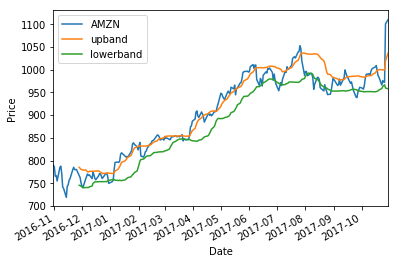

In [125]:
### If stock price is out of rollinger bands, then it presents a buying or selling opportunity
ax=dfStocks.loc['2016-10-31':'2017-10-31','AMZN'].plot(label='AMZN')
rm_AMZN=dfStocks.loc['2016-10-31':'2017-10-31','AMZN'].rolling(window=20,center=False).mean()
rs_AMZN=dfStocks.loc['2016-10-31':'2017-10-31','AMZN'].rolling(window=20,center=False).std()
(rm_AMZN+rs_AMZN).plot(label='upband',ax=ax)
(rm_AMZN-rs_AMZN).plot(label='lowerband',ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()


#### Explore the cumulative returns of SPY and a certain stock

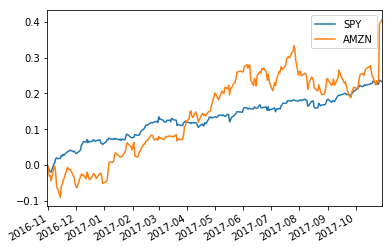

In [136]:
### Daily return tells important information about stock performance
def compute_cuReturns(df):
    dReturns=df.copy()
    dReturns=dReturns/dReturns[0]-1
    return dReturns
dRSPY=compute_cuReturns(dfStocks.loc['2016-10-31':'2017-10-31','SPY'])
dRAMZN=compute_cuReturns(dfStocks.loc['2016-10-31':'2017-10-31','AMZN'])
ax=dRSPY.plot()
dRAMZN.plot(ax=ax)
ax.legend()
plt.show()

##### From the graph it can be seen that AMZN returns spikes at the end of October 2017, while it underperformed at the end of 2016